# Fashion MNIST Dataset Convolutional Neural Network

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset to be usable in pytorch

In [2]:
mnist_datasets_train = datasets.FashionMNIST(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())

mnist_datasets_test = datasets.FashionMNIST(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())

## Creating the training dataset

In [3]:
from torch.utils.data import DataLoader
batch_size = 256

train_iter = DataLoader(mnist_datasets_train,batch_size,shuffle=True)

In [4]:
X,y = next(iter(train_iter))

## Creating the test dataset

In [5]:
test_iter = DataLoader(mnist_datasets_test,batch_size,shuffle=True)

In [6]:
X_test,y_test = next(iter(test_iter))

## Visualising and understanding the dimensionality of the input images

In [7]:
print(f'The dimensions of each input image is {X.size()} The number of input channels is {X.size()[1]}')
print(f'The output labels are as follows {y}')

The dimensions of each input image is torch.Size([256, 1, 28, 28]) The number of input channels is 1
The output labels are as follows tensor([2, 8, 0, 7, 2, 8, 4, 1, 5, 8, 5, 6, 0, 6, 5, 6, 7, 4, 3, 8, 1, 5, 9, 0,
        7, 6, 2, 4, 2, 2, 0, 8, 9, 0, 5, 2, 2, 0, 7, 7, 3, 9, 9, 3, 4, 3, 0, 6,
        9, 6, 0, 1, 7, 1, 7, 6, 5, 0, 1, 5, 2, 8, 0, 2, 9, 9, 7, 2, 5, 9, 3, 3,
        3, 8, 5, 6, 0, 3, 6, 5, 4, 8, 2, 8, 3, 6, 0, 2, 0, 6, 4, 1, 7, 1, 1, 3,
        1, 4, 7, 9, 6, 0, 5, 4, 1, 8, 9, 1, 8, 7, 4, 9, 4, 2, 3, 6, 1, 0, 2, 0,
        7, 0, 5, 3, 3, 0, 7, 4, 3, 6, 1, 2, 8, 4, 6, 6, 0, 9, 0, 5, 7, 5, 2, 5,
        0, 6, 7, 3, 5, 4, 9, 3, 9, 1, 1, 3, 1, 5, 8, 6, 9, 7, 2, 4, 6, 7, 1, 3,
        8, 5, 7, 1, 7, 3, 2, 1, 0, 2, 0, 3, 1, 8, 9, 2, 0, 5, 5, 1, 5, 8, 5, 0,
        0, 6, 1, 2, 1, 9, 4, 0, 8, 0, 7, 0, 0, 7, 7, 2, 1, 6, 9, 6, 6, 4, 8, 8,
        2, 6, 7, 5, 8, 7, 1, 5, 2, 3, 5, 9, 7, 1, 8, 4, 1, 8, 9, 8, 2, 3, 0, 2,
        8, 8, 4, 1, 7, 6, 9, 6, 3, 4, 7, 2, 5, 4, 1, 7])


## Example Image and corresponding label

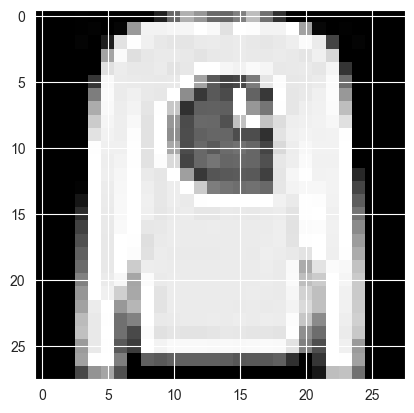

In [8]:
plt.imshow(X[0].squeeze(),cmap='gray')

## Label Mapper for text based prediction output

# CNN Architecture

In [209]:
class CNN(torch.nn.Module):
    def __init__(self,num_channels,num_outputs):
        super(CNN,self).__init__()
        self.num_channels = num_channels
        self.num_outputs = num_outputs

        #Create the first convolution -> ReLu -> Pool layer (note the structure of this can be changed)
        self.conv1 = torch.nn.Conv2d(in_channels=num_channels,out_channels=14,kernel_size=4,padding=1,stride=1)
        self.relu1 = torch.nn.ReLU()
        self.avgpool1 = torch.nn.AvgPool2d(kernel_size=3,stride=2)

        #Create the Second convolution,relu, pooling layer
        self.conv2 = torch.nn.Conv2d(in_channels=14,out_channels=36,kernel_size=3)
        self.relu2 = torch.nn.ReLU()
        self.avgpool2 = torch.nn.AvgPool2d(kernel_size=3,stride=2)

        #initialize the only fully connected -> ReLu layer
        self.linear = torch.nn.Linear(in_features=900,out_features=900)
        self.relu3 = torch.nn.ReLU()

        #Initialize a second fully connected -> ReLu layer
        self.linear1 = torch.nn.Linear(in_features=900,out_features=900)
        self.relu4 = torch.nn.ReLU()

        #Initialize a third fully connected -> ReLU layer
        self.linear2 = torch.nn.Linear(in_features=900,out_features=300)
        self.relu5 = torch.nn.ReLU()

        #Final Softmax stage for classification
        self.linear3 = torch.nn.Linear(in_features=300,out_features=num_outputs)
        self.softmax = torch.nn.Softmax(dim=1)

        #Initialize the parameters according to the kaiming normal methodology
        torch.nn.init.kaiming_normal_(self.linear.weight,nonlinearity='relu')
        torch.nn.init.zeros_(self.linear.bias)

        torch.nn.init.kaiming_normal_(self.linear1.weight,nonlinearity='relu')
        torch.nn.init.zeros_(self.linear1.bias)

        torch.nn.init.kaiming_normal_(self.linear2.weight,nonlinearity='relu')
        torch.nn.init.zeros_(self.linear2.bias)

        torch.nn.init.kaiming_normal_(self.linear3.weight,nonlinearity='relu')
        torch.nn.init.zeros_(self.linear3.bias)

        #Define the proportion of neurons to dropout
        self.dropout = torch.nn.Dropout(0.25)

    def forward(self,x):
        #Pass the input image into the first convolutional layer
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.avgpool1(x)

        #Pass the input image into the second convolutional layer
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.avgpool2(x)

        #Pass through the 1st fully connected layer
        x = torch.flatten(x,1)
        x = self.linear(x)
        x = self.dropout(x)
        x = self.relu3(x)

        #Pass through the 2nd fully connected layer
        x = self.linear1(x)
        x = self.dropout(x)
        x = self.relu4(x)

        #Pass through the 3rd fully connected layer
        x = self.linear2(x)
        x = self.dropout(x)
        x = self.relu5(x)

        #Pass the output to the softmax classifier to get the output
        x = self.linear3(x)
        x = self.dropout(x)
        x = self.softmax(x)

        return x

In [210]:
model = CNN(num_channels=1,num_outputs=10)
print(model)

CNN(
  (conv1): Conv2d(1, 14, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (avgpool1): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (conv2): Conv2d(14, 36, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (avgpool2): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (linear): Linear(in_features=900, out_features=900, bias=True)
  (relu3): ReLU()
  (linear1): Linear(in_features=900, out_features=900, bias=True)
  (relu4): ReLU()
  (linear2): Linear(in_features=900, out_features=300, bias=True)
  (relu5): ReLU()
  (linear3): Linear(in_features=300, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.25, inplace=False)
)


# Create a metric for calculating the Accuracy of the network on the training data

In [204]:
def accuracy(y_hat,y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
        cmp = (y_hat.type(y.dtype) == y)
        return float(torch.sum(cmp))

## Create a function for training the network

Need a seperate evaluation function that has
torch.no_grad() and sets the model.eval() to speed up test performance

In [205]:
def train_model(model,X,y,X_test,y_test,accuracy,epochs):

    # Create the loss component
    loss = torch.nn.CrossEntropyLoss()

    # Create the optimizer term
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    score_train = []
    score_test = []

    for num_epochs in epochs:
        for epoch in range(num_epochs):
            model.train()
            y_hat = model(X)
            l = loss(y_hat,y)

            optimizer.zero_grad()

            l.backward()
            optimizer.step()

        # Training Accuracy
        score_train.append(accuracy(model(X),y)/len(y))

        # Test Accuracy
        torch.no_grad()
        model.eval()
        score_test.append(accuracy(model(X_test),y_test)/len(y_test))

    return score_train,score_test

In [211]:
epochs = range(0,30)
s1,s2 = train_model(model,X,y,X_test,y_test,accuracy,epochs)

## Visualise the training and test accuracy over the number of epochs

Text(0, 0.5, 'Accuracy')

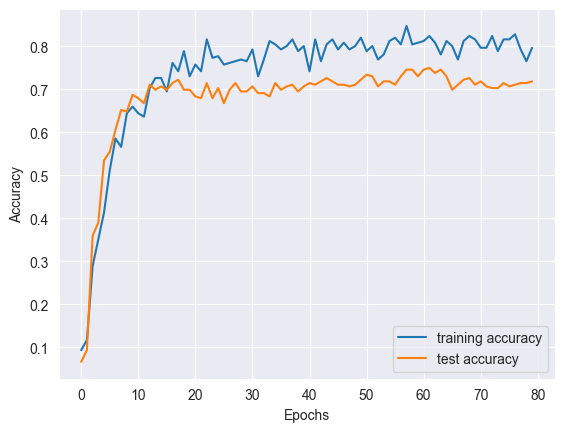

In [212]:
sns.lineplot(x=epochs,y=s1,label='training accuracy')
sns.lineplot(x=epochs,y=s2,label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [213]:
s2

[0.06640625,
 0.09375,
 0.359375,
 0.390625,
 0.53515625,
 0.5546875,
 0.60546875,
 0.65234375,
 0.6484375,
 0.6875,
 0.6796875,
 0.66796875,
 0.7109375,
 0.69921875,
 0.70703125,
 0.69921875,
 0.71484375,
 0.72265625,
 0.69921875,
 0.69921875,
 0.68359375,
 0.6796875,
 0.71484375,
 0.6796875,
 0.703125,
 0.66796875,
 0.69921875,
 0.71484375,
 0.6953125,
 0.6953125,
 0.70703125,
 0.69140625,
 0.69140625,
 0.68359375,
 0.71484375,
 0.69921875,
 0.70703125,
 0.7109375,
 0.6953125,
 0.70703125,
 0.71484375,
 0.7109375,
 0.71875,
 0.7265625,
 0.71875,
 0.7109375,
 0.7109375,
 0.70703125,
 0.7109375,
 0.72265625,
 0.734375,
 0.73046875,
 0.70703125,
 0.71875,
 0.71875,
 0.7109375,
 0.73046875,
 0.74609375,
 0.74609375,
 0.73046875,
 0.74609375,
 0.75,
 0.73828125,
 0.74609375,
 0.73046875,
 0.69921875,
 0.7109375,
 0.72265625,
 0.7265625,
 0.7109375,
 0.71875,
 0.70703125,
 0.703125,
 0.703125,
 0.71484375,
 0.70703125,
 0.7109375,
 0.71484375,
 0.71484375,
 0.71875]